<a href="https://colab.research.google.com/github/lauraemmanuella/DataScience/blob/main/6_PreparacaoAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Notebook referente à aula 2-Preparação dos dados na disciplina Aprendizado de Máquina**

In [ ]:
#monte o drive caso precise usar/salvar arquivos do seu drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#mude o ponto de execução para outro diretório, caso deseje
%cd /content/drive/MyDrive/Colab Notebooks/DataScience

/content/drive/MyDrive/Colab Notebooks/AprendizadoMaquina


# Preparação dos dados para tarefas de AM


[Dataset retirado daqui](https://github.com/CaiqueCoelho/Preprocessing-Dataset-Template)



## 1) Visão geral do dataset

In [1]:
import pandas as pd

In [2]:
#OU coloca direto o endereço do csv (nesse caso, nem precisaria montar o drive)
df = pd.read_csv('https://raw.githubusercontent.com/CaiqueCoelho/Preprocessing-Dataset-Template/master/fake_data_2.csv')

In [ ]:
#visão do dataset
df

,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,sim
1,Analista,22,8000.0,2000.0,não
2,Programador,30,NaN,1000.0,não
3,Gerente,24,15100.0,NaN,não
4,Gerente,30,35000.0,6000.0,sim
5,Programador,22,5300.0,2000.0,não
6,Analista,20,NaN,1200.0,não
7,Diretor,50,18000.0,8000.0,sim
8,Fundador,65,38000.0,28000.0,sim
9,Analista,32,7300.0,4000.0,não


## 2) Dados faltantes

Sugestão de leitura: https://ealexbarros.medium.com/principais-tipos-de-dados-faltantes-missing-em-um-dataset-49aa35cf18c8

**Estratégias:**

1.   **Remoção das colunas**: Solução menos recomendada. Somente deverá ser utilizada quando a variável não exercer influência no resultado procurado ou quando a maior parte das amostras não tiver o valor dessa coluna.
2.   **Remoção das linhas**: Solução melhor, porém ainda não é a ideal para um dataset com poucos exemplos.
3.   **Preenchimento com um valor definido**: Pode-se preencher os dados faltantes com o valor que melhor convier para o problema. Para ser usado adequadamente, precisa-se saber que valor é esse.
4.   **Preenchimento com a média ou moda**: Solução mais adequada na maioria dos casos. 

In [ ]:
#Verifica se tem NaN
hasNan = df.isnull().sum()
print(hasNan)

cargo      0
idade      0
salario    2
bonus      2
sócio      0
dtype: int64


[Documentação dropna](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html)

In [ ]:
#1. Remoção das colunas

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste.dropna(axis=1, inplace=True) #axis = 1 indica coluna; inplace True executa a operação de fato, não apenas no retorno dessa linha

print(dfTeste)
#Observe que nesse exemplo ficamos sem as colunas salário e bônus

          cargo  idade sócio
0       Diretor     45   sim
1      Analista     22   não
2   Programador     30   não
3       Gerente     24   não
4       Gerente     30   sim
5   Programador     22   não
6      Analista     20   não
7       Diretor     50   sim
8      Fundador     65   sim
9      Analista     32   não
10  Programador     35   não
11  Programador     28   não
12     Fundador     28   sim
13  Programador     30   sim


In [ ]:
#2. Remoção das linhas

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste.dropna(inplace=True) #o default do dropna é axis = 0 (linhas)

print(dfTeste)
#Observe que nesse exemplo, ficamos com menos exemplos

          cargo  idade  salario    bonus sócio
0       Diretor     45  24000.0  10000.0   sim
1      Analista     22   8000.0   2000.0   não
4       Gerente     30  35000.0   6000.0   sim
5   Programador     22   5300.0   2000.0   não
7       Diretor     50  18000.0   8000.0   sim
8      Fundador     65  38000.0  28000.0   sim
9      Analista     32   7300.0   4000.0   não
11  Programador     28   4500.0   2200.0   não
12     Fundador     28  30000.0  12000.0   sim
13  Programador     30  14000.0  10000.0   sim


In [ ]:
#3. Preenchimento com um valor definido

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste.fillna(0, inplace=True) #Preencher todos os valores faltantes por zero (não é uma boa estratégia)

print(dfTeste)

          cargo  idade  salario    bonus sócio
0       Diretor     45  24000.0  10000.0   sim
1      Analista     22   8000.0   2000.0   não
2   Programador     30      0.0   1000.0   não
3       Gerente     24  15100.0      0.0   não
4       Gerente     30  35000.0   6000.0   sim
5   Programador     22   5300.0   2000.0   não
6      Analista     20      0.0   1200.0   não
7       Diretor     50  18000.0   8000.0   sim
8      Fundador     65  38000.0  28000.0   sim
9      Analista     32   7300.0   4000.0   não
10  Programador     35   2344.0      0.0   não
11  Programador     28   4500.0   2200.0   não
12     Fundador     28  30000.0  12000.0   sim
13  Programador     30  14000.0  10000.0   sim


In [ ]:
#4. Preencher com a média 

from sklearn.impute import SimpleImputer
import numpy as np

impute_mean = SimpleImputer(missing_values = np.nan, strategy='mean')

df[['salario', 'bonus']] = impute_mean.fit_transform(df[['salario', 'bonus']]) 

print(df)

          cargo  idade       salario    bonus sócio
0       Diretor     45  24000.000000  10000.0   sim
1      Analista     22   8000.000000   2000.0   não
2   Programador     30  16795.333333   1000.0   não
3       Gerente     24  15100.000000   7200.0   não
4       Gerente     30  35000.000000   6000.0   sim
5   Programador     22   5300.000000   2000.0   não
6      Analista     20  16795.333333   1200.0   não
7       Diretor     50  18000.000000   8000.0   sim
8      Fundador     65  38000.000000  28000.0   sim
9      Analista     32   7300.000000   4000.0   não
10  Programador     35   2344.000000   7200.0   não
11  Programador     28   4500.000000   2200.0   não
12     Fundador     28  30000.000000  12000.0   sim
13  Programador     30  14000.000000  10000.0   sim


**Observação**

A classe [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) possui as estratégias: Média, Mediana, Mais frequente ou Valor constante

## 3) Outliers

https://lucasmbribeiro.medium.com/boxplot-1c8d2e0cb158


https://towardsdatascience.com/why-1-5-in-iqr-method-of-outlier-detection-5d07fdc82097


https://pt.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/identifying-outliers-iqr-rule


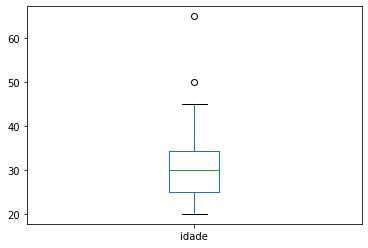

In [ ]:
df['idade'].plot(kind = 'box')

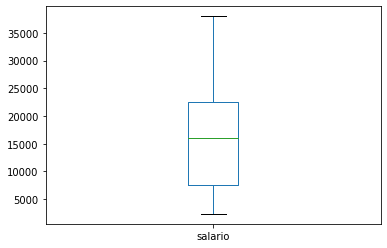

In [ ]:
df['salario'].plot(kind = 'box')

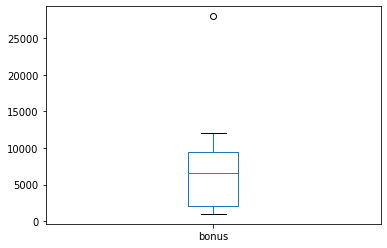

In [ ]:
df['bonus'].plot(kind = 'box')

In [ ]:
#trata outlier pela regra do 1.5*IQR (variação interquartil)

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

q1 = dfTeste['idade'].quantile(0.25)
q3 = dfTeste['idade'].quantile(0.75)
iqr = q3 - q1
lLim = q1 - 1.5 * iqr 
hLim = q3 + 1.5 * iqr
dfTeste.loc[dfTeste['idade'] < lLim, 'idade'] = lLim #substitui os valores abaixo do limite inferior pelo limite inferior
dfTeste.loc[dfTeste['idade'] > hLim, 'idade'] = hLim #substitui os valores acima do limite superior pelo limite superior

print(dfTeste)      

          cargo   idade       salario    bonus sócio
0       Diretor  45.000  24000.000000  10000.0   sim
1      Analista  22.000   8000.000000   2000.0   não
2   Programador  30.000  16795.333333   1000.0   não
3       Gerente  24.000  15100.000000   7200.0   não
4       Gerente  30.000  35000.000000   6000.0   sim
5   Programador  22.000   5300.000000   2000.0   não
6      Analista  20.000  16795.333333   1200.0   não
7       Diretor  48.125  18000.000000   8000.0   sim
8      Fundador  48.125  38000.000000  28000.0   sim
9      Analista  32.000   7300.000000   4000.0   não
10  Programador  35.000   2344.000000   7200.0   não
11  Programador  28.000   4500.000000   2200.0   não
12     Fundador  28.000  30000.000000  12000.0   sim
13  Programador  30.000  14000.000000  10000.0   sim


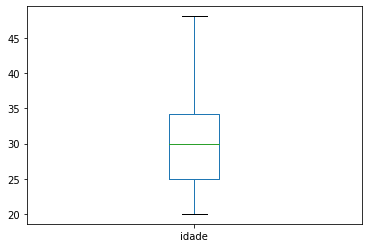

In [ ]:
dfTeste['idade'].plot(kind = 'box')

## 4) Mudança de escala

As duas técnicas mais populares para reescalar dados numéricos são **normalização por reescala** e **normalização por padronização**. 

* A **normalização por reescala** dimensiona cada variável de entrada  separadamente para o intervalo 0:1 (ou -1:1 quando tem valores negativos). 

* A **normalização por padronização** dimensiona cada variável de entrada separadamente para ter uma média 0 e um desvio padrão 1.


Outros escaladores: 
https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html


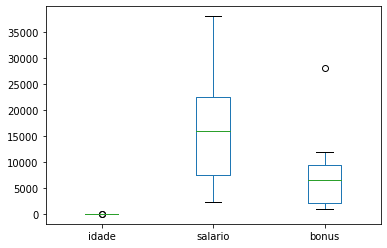

In [ ]:
#Observe por esse gráfico, a diferença de escala entre as variáveis numéricas
#Para alguns algoritmos, isso faz com que ele praticamente desconsidere aqueles com escala menor
df.plot(kind = 'box') 

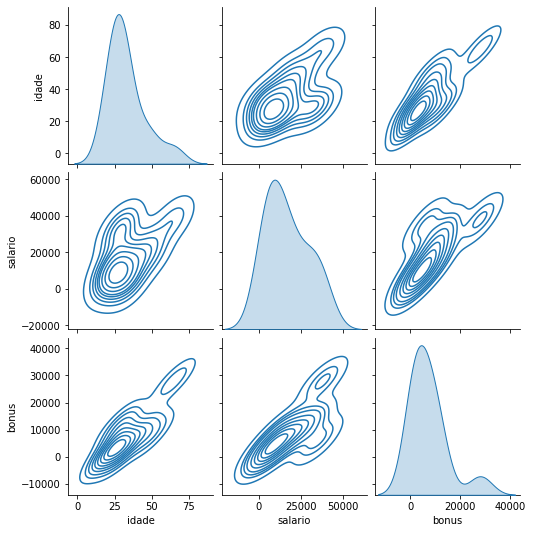

In [ ]:
import seaborn as sb

sb.pairplot(df, kind='kde')

**StandardScaler**

Normalização por padronização

In [ ]:
from sklearn.preprocessing import StandardScaler

dfTeste = df.copy() #fazendo uma cópia apenas para testar o comando (não será aplicado ao df)

dfTeste[['idade', 'salario', 'bonus']] = StandardScaler().fit_transform(dfTeste[['idade', 'salario', 'bonus']])

print(dfTeste)

          cargo     idade   salario     bonus sócio
0       Diretor  1.002248  0.657862  0.415034   sim
1      Analista -0.907361 -0.803107 -0.770778   não
2   Programador -0.243149  0.000000 -0.919005   não
3       Gerente -0.741308 -0.154802  0.000000   não
4       Gerente -0.243149  1.662279 -0.177872   sim
5   Programador -0.907361 -1.049646 -0.770778   não
6      Analista -1.073414  0.000000 -0.889360   não
7       Diretor  1.417381  0.109999  0.118581   sim
8      Fundador  2.662778  1.936211  3.083113   sim
9      Analista -0.077096 -0.867024 -0.474325   não
10  Programador  0.171983 -1.319560  0.000000   não
11  Programador -0.409202 -1.122694 -0.741133   não
12     Fundador -0.409202  1.205726  0.711488   sim
13  Programador -0.243149 -0.255244  0.415034   sim


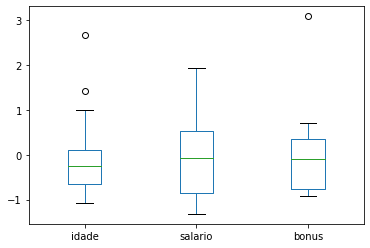

In [ ]:
dfTeste.plot(kind = 'box') 

**MinMaxScale**

Normalização por reescala

In [ ]:
from sklearn.preprocessing import MinMaxScaler

df[['idade', 'salario', 'bonus']] = MinMaxScaler().fit_transform(df[['idade', 'salario', 'bonus']])

print(df)

          cargo     idade   salario     bonus sócio
0       Diretor  0.555556  0.607359  0.333333   sim
1      Analista  0.044444  0.158627  0.037037   não
2   Programador  0.222222  0.405299  0.000000   não
3       Gerente  0.088889  0.357752  0.229630   não
4       Gerente  0.222222  0.915863  0.185185   sim
5   Programador  0.044444  0.082903  0.037037   não
6      Analista  0.000000  0.405299  0.007407   não
7       Diretor  0.666667  0.439085  0.259259   sim
8      Fundador  1.000000  1.000000  1.000000   sim
9      Analista  0.266667  0.138995  0.111111   não
10  Programador  0.333333  0.000000  0.229630   não
11  Programador  0.177778  0.060467  0.044444   não
12     Fundador  0.177778  0.775634  0.407407   sim
13  Programador  0.222222  0.326902  0.333333   sim


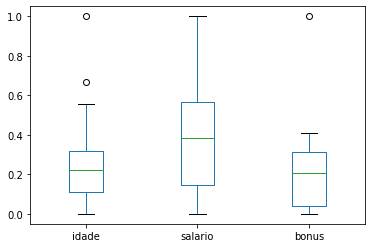

In [ ]:
df.plot(kind = 'box') 

## 5) Mudança de tipo

As colunas cargo e sócio são categóricas. Ao transformá-las em numéricas, devemos ter cuidado com a **ordem** imposta pelos números. 

Caso os atributos categóricos sejam não ordenáveis, devemos criar colunas que representem cada possível valor. Assim cada amostra terá o valor 0 ou 1 para esse atributo,indicando sua presença ou ausência.

In [ ]:
dfCargo = pd.get_dummies(df['cargo'], prefix = 'cargo')

In [ ]:
dfCargo

,cargo_Analista,cargo_Diretor,cargo_Fundador,cargo_Gerente,cargo_Programador
0,0,1,0,0,0
1,1,0,0,0,0
2,0,0,0,0,1
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,0,1
6,1,0,0,0,0
7,0,1,0,0,0
8,0,0,1,0,0
9,1,0,0,0,0


In [ ]:
df.iloc[:, 1:]

,idade,salario,bonus,sócio
0,0.555556,0.607359,0.333333,sim
1,0.044444,0.158627,0.037037,não
2,0.222222,0.405299,0.000000,não
3,0.088889,0.357752,0.229630,não
4,0.222222,0.915863,0.185185,sim
5,0.044444,0.082903,0.037037,não
6,0.000000,0.405299,0.007407,não
7,0.666667,0.439085,0.259259,sim
8,1.000000,1.000000,1.000000,sim
9,0.266667,0.138995,0.111111,não


In [ ]:
df = dfCargo.join(df.iloc[:, 1:]) #junta o dfCargo com o df sem a coluna cargo

In [ ]:
df

,cargo_Analista,cargo_Diretor,cargo_Fundador,cargo_Gerente,cargo_Programador,idade,salario,bonus,sócio
0,0,1,0,0,0,0.555556,0.607359,0.333333,sim
1,1,0,0,0,0,0.044444,0.158627,0.037037,não
2,0,0,0,0,1,0.222222,0.405299,0.000000,não
3,0,0,0,1,0,0.088889,0.357752,0.229630,não
4,0,0,0,1,0,0.222222,0.915863,0.185185,sim
5,0,0,0,0,1,0.044444,0.082903,0.037037,não
6,1,0,0,0,0,0.000000,0.405299,0.007407,não
7,0,1,0,0,0,0.666667,0.439085,0.259259,sim
8,0,0,1,0,0,1.000000,1.000000,1.000000,sim
9,1,0,0,0,0,0.266667,0.138995,0.111111,não


**LabelEnconder**

Transforma os nomes em números

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [ ]:
df['sócio'] = le.fit_transform(df['sócio'])

In [ ]:
le.classes_

array(['não', 'sim'], dtype=object)

In [ ]:
df

,cargo,idade,salario,bonus,sócio
0,Diretor,45,24000.0,10000.0,1
1,Analista,22,8000.0,2000.0,0
2,Programador,30,NaN,1000.0,0
3,Gerente,24,15100.0,NaN,0
4,Gerente,30,35000.0,6000.0,1
5,Programador,22,5300.0,2000.0,0
6,Analista,20,NaN,1200.0,0
7,Diretor,50,18000.0,8000.0,1
8,Fundador,65,38000.0,28000.0,1
9,Analista,32,7300.0,4000.0,0


## 6) Redução de dimensionalidade

### Correlação

In [ ]:
corr = df[['idade', 'salario', 'bonus']].corr()

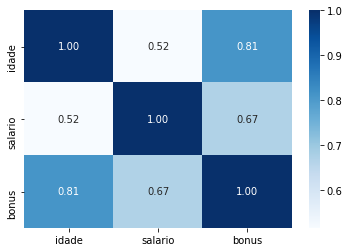

In [ ]:
sb.heatmap(corr, annot=True, fmt=".2f", cmap='Blues')

### Seleção de atributos

https://scikit-learn.org/stable/modules/feature_selection.html

### Agregação de atributos

Uma forma muito usada de redução de dimensionalidade é o **PCA (Análise dos componentes principais)** que é uma técnica que transforma atributos com uma certa correlação em um único atributo. 

O PCA deve ser aplicado apenas em casos em que o seu dataset possui muitas colunas, realmente um número muito grande e o treino do seu modelo acaba por ser muito demorado ou inviável devido ao alto número de colunas, uma vez que o PCA é uma técnica na qual sempre haverá perda de informações. 

Em nosso exemplo o PCA será aplicado de forma meramente ilustrativa uma vez que não possuímos muitas colunas.

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
df.iloc[:,:-1] #retorna todo o dataframe, exceto a última coluna (alvo)

In [ ]:
from sklearn.decomposition import PCA

 #O atributo n_components representa quantos atributos queremos deixar
 #usando ’mle’ o Minka’s MLE será utilizado para escolher a melhor dimensão a ser mantida
pca = PCA(n_components='mle')

newData = pca.fit_transform(df.iloc[:,:-1])

In [ ]:
dfNew = pd.DataFrame(newData)

In [ ]:
dfNew

,0,1,2,3,4,5,6
0,0.538666,-0.132673,-0.335747,0.797916,0.084665,-0.057145,0.070214
1,-0.136827,0.932838,-0.212710,-0.162717,-0.002876,0.045334,0.018614
2,-0.603636,-0.376445,0.016362,-0.048506,0.072547,-0.233347,-0.094616
3,0.201868,0.182088,0.904577,0.154439,-0.062577,0.263624,0.034314
4,0.469561,0.081266,0.958319,0.128387,-0.036214,-0.226276,-0.037466
5,-0.782750,-0.296091,0.010318,-0.047064,0.119467,0.057194,0.013656
6,-0.050146,0.916120,-0.161142,-0.184673,0.082310,-0.167030,0.038878
7,0.473515,-0.118716,-0.382454,0.837649,0.015171,0.067569,-0.062324
8,1.213799,-0.626536,-0.301079,-0.592176,-0.310027,-0.026410,-0.008237
9,-0.061571,0.863221,-0.280715,-0.147103,-0.188053,0.061814,-0.054286


## 7) Balanceamento da base

Bases de dados desbalanceadas são aquelas em que há uma maior proporção de amostras de uma classe do que da(s) outra(s)

Chamamos de classe minoritária a que tem menos exemplos e de classe majoritária a que tem mais exemplos

Para efetuar o balanceamento podemos fazer um oversampling (sobreamostragem) ou um undersampling (subamostragem). No primeiro, nós aumentamos exemplos da classe minoritária e no segundo nós diminuimos exemplos da classe majoritária.


https://imbalanced-learn.org/stable/user_guide.html#user-guide


https://imbalanced-learn.org/stable/references/index.html

In [ ]:
#verifica desbalanceamento em relação ao gender
df['sócio'].value_counts()

0    8
1    6
Name: sócio, dtype: int64

In [ ]:
from imblearn.under_sampling import NearMiss 

X, y = NearMiss().fit_resample(df.drop(columns=['sócio']), df['sócio'])


In [ ]:
dfTeste = pd.DataFrame(X, columns=df.columns.drop('sócio'))
dfTeste['sócio'] = y
print(dfTeste)

    cargo_Analista  cargo_Diretor  cargo_Fundador  ...   salario     bonus  sócio
0              0.0            0.0             0.0  ...  0.405299  0.000000      0
1              0.0            0.0             0.0  ...  0.000000  0.229630      0
2              0.0            0.0             0.0  ...  0.357752  0.229630      0
3              0.0            0.0             0.0  ...  0.060467  0.044444      0
4              0.0            0.0             0.0  ...  0.082903  0.037037      0
5              1.0            0.0             0.0  ...  0.138995  0.111111      0
6              0.0            1.0             0.0  ...  0.607359  0.333333      1
7              0.0            0.0             0.0  ...  0.915863  0.185185      1
8              0.0            1.0             0.0  ...  0.439085  0.259259      1
9              0.0            0.0             1.0  ...  1.000000  1.000000      1
10             0.0            0.0             1.0  ...  0.775634  0.407407      1
11             0

In [ ]:
dfTeste['sócio'].value_counts()

1    6
0    6
Name: sócio, dtype: int64

##8) Salvando dataset processado

In [ ]:
df.to_csv('./bases/fake_data_process.csv', index=False)